In [1]:
import gymnasium as gym
import numpy as np
import random

In [ ]:
#### SARSA ####

env = gym.make("Taxi-v3")

def train_sarsa(num_episodes=1000, lr=0.5, gamma=0.99):
  state_space_size = env.observation_space.n
  action_space_size = env.action_space.n

  q_table = np.zeros((state_space_size, action_space_size))

  max_steps = 100
  epsilon = 1.0     
  min_epsilon = 0.01
  max_epsilon = 1.0
  decay_rate = 0.005

  rewards = []
  steps_used = []

  for episode in range(num_episodes):
      state, _ = env.reset()
      total_rewards = 0

      if random.uniform(0, 1) < epsilon:
          action = env.action_space.sample()
      else:
          action = np.argmax(q_table[state, :])

      for step in range(max_steps):
          new_state, reward, terminated, truncated, _ = env.step(action)
          done = terminated or truncated

          if random.uniform(0, 1) < epsilon:
              next_action = env.action_space.sample()
          else:
              next_action = np.argmax(q_table[new_state, :])

          # SARSA 
          q_table[state, action] += lr * (
              reward + gamma * q_table[new_state, next_action] - q_table[state, action]
          )

          total_rewards += reward
          state = new_state
          action = next_action

          if done:
              break

      # Epsilon Decay
      epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

      rewards.append(total_rewards)
      steps_used.append(step)
  return rewards, steps_used, q_table



In [3]:
rewards_1, steps_used_1, q_table_1 = train_sarsa(2000, lr = 0.01, gamma = 0.99)
rewards_2, steps_used_2, q_table_2 = train_sarsa(2000, lr = 0.1, gamma = 0.99)
rewards_3, steps_used_3, q_table_3 = train_sarsa(2000, lr = 0.5, gamma = 0.99)
rewards_4, steps_used_4, q_table_4 = train_sarsa(2000, lr = 1, gamma = 0.99)

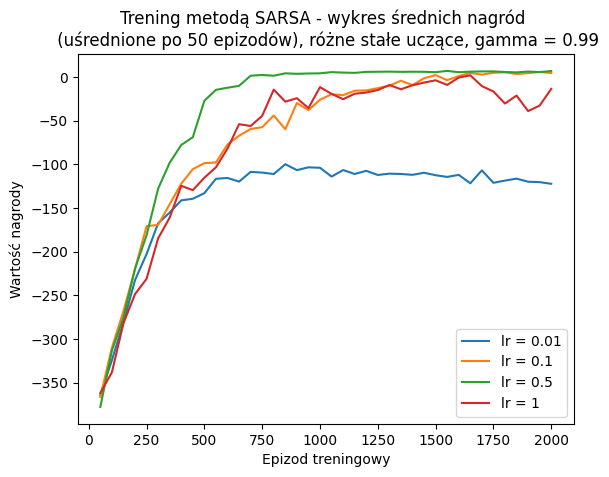

In [4]:
import matplotlib.pyplot as plt
mean_reward_total = np.mean(np.array(rewards_1))
moving_average_1 = [np.mean(np.array(rewards_1[50*i:50*(i+1)])) for i in range(int(len(rewards_1)/50))]
moving_average_2 = [np.mean(np.array(rewards_2[50*i:50*(i+1)])) for i in range(int(len(rewards_2)/50))]
moving_average_3 = [np.mean(np.array(rewards_3[50*i:50*(i+1)])) for i in range(int(len(rewards_3)/50))]
moving_average_4 = [np.mean(np.array(rewards_4[50*i:50*(i+1)])) for i in range(int(len(rewards_4)/50))]
domain = list(range(25,len(rewards_1),50))
#plt.plot(domain,moving_average)

x = list(range(50,2001,50))
plt.plot(x, moving_average_1, label='lr = 0.01')
plt.plot(x, moving_average_2, label='lr = 0.1')
plt.plot(x, moving_average_3, label='lr = 0.5')
plt.plot(x, moving_average_4, label='lr = 1')
plt.title(f"Trening metodą SARSA - wykres średnich nagród \n (uśrednione po 50 epizodów), różne stałe uczące, gamma = 0.99")
plt.xlabel('Epizod treningowy')
plt.ylabel('Wartość nagrody')
plt.legend()
plt.savefig(f"Mean_reward_taxi_lr_sarsa.png")
plt.show()

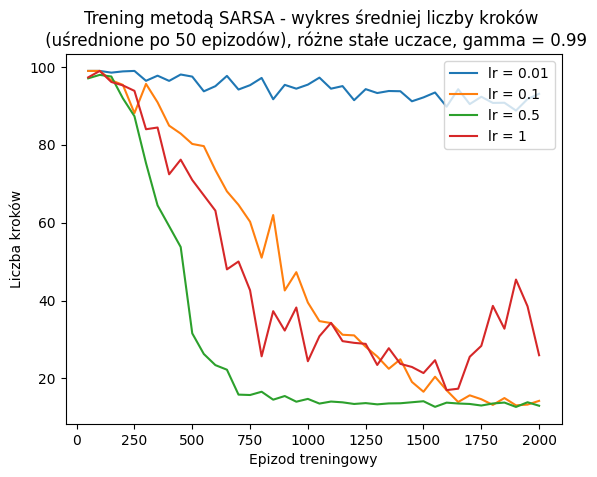

In [5]:

steps_average_1 = [np.mean(np.array(steps_used_1[50*i:50*(i+1)])) for i in range(int(len(steps_used_1)/50))]
steps_average_2 = [np.mean(np.array(steps_used_2[50*i:50*(i+1)])) for i in range(int(len(steps_used_2)/50))]
steps_average_3 = [np.mean(np.array(steps_used_3[50*i:50*(i+1)])) for i in range(int(len(steps_used_3)/50))]
steps_average_4 = [np.mean(np.array(steps_used_4[50*i:50*(i+1)])) for i in range(int(len(steps_used_4)/50))]
plt.plot(x, steps_average_1, label='lr = 0.01')
plt.plot(x, steps_average_2, label='lr = 0.1')
plt.plot(x, steps_average_3, label='lr = 0.5')
plt.plot(x, steps_average_4, label='lr = 1')
plt.title(f"Trening metodą SARSA - wykres średniej liczby kroków \n (uśrednione po 50 epizodów), różne stałe uczace, gamma = 0.99")
plt.xlabel('Epizod treningowy')
plt.ylabel('Liczba kroków')
plt.legend(loc='upper right')
plt.savefig(f"Mean_steps_taxi_lr_sarsa.png")
plt.show()
# Dobrze nauczony agent nie powinien przekraczać 20 kroków do wykonania zadania

In [6]:
rewards_1, steps_used_1, q_table_1 = train_sarsa(2000, lr = 0.5, gamma = 0.99)
rewards_2, steps_used_2, q_table_2 = train_sarsa(2000, lr = 0.5, gamma = 0.9)
rewards_3, steps_used_3, q_table_3 = train_sarsa(2000, lr = 0.5, gamma = 0.5)
rewards_4, steps_used_4, q_table_4 = train_sarsa(2000, lr = 0.5, gamma = 0.1)

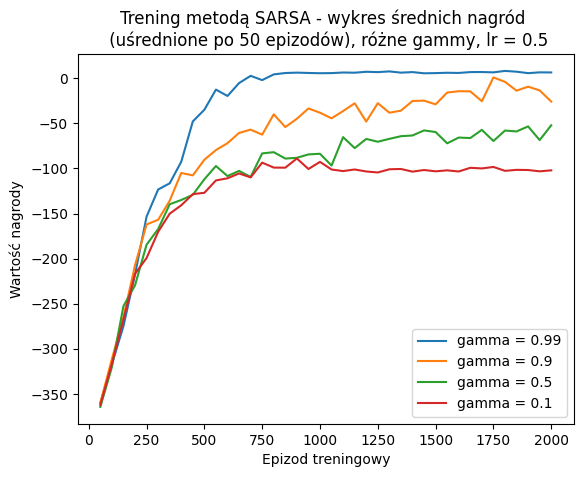

In [7]:
import matplotlib.pyplot as plt
mean_reward_total = np.mean(np.array(rewards_1))
moving_average_1 = [np.mean(np.array(rewards_1[50*i:50*(i+1)])) for i in range(int(len(rewards_1)/50))]
moving_average_2 = [np.mean(np.array(rewards_2[50*i:50*(i+1)])) for i in range(int(len(rewards_2)/50))]
moving_average_3 = [np.mean(np.array(rewards_3[50*i:50*(i+1)])) for i in range(int(len(rewards_3)/50))]
moving_average_4 = [np.mean(np.array(rewards_4[50*i:50*(i+1)])) for i in range(int(len(rewards_4)/50))]
domain = list(range(25,len(rewards_1),50))
#plt.plot(domain,moving_average)

x = list(range(50,2001,50))
plt.plot(x, moving_average_1, label='gamma = 0.99')
plt.plot(x, moving_average_2, label='gamma = 0.9')
plt.plot(x, moving_average_3, label='gamma = 0.5')
plt.plot(x, moving_average_4, label='gamma = 0.1')
plt.title(f"Trening metodą SARSA - wykres średnich nagród \n (uśrednione po 50 epizodów), różne gammy, lr = 0.5")
plt.xlabel('Epizod treningowy')
plt.ylabel('Wartość nagrody')
plt.legend()
plt.savefig(f"Mean_reward_taxi_gamma_sarsa.png")
plt.show()

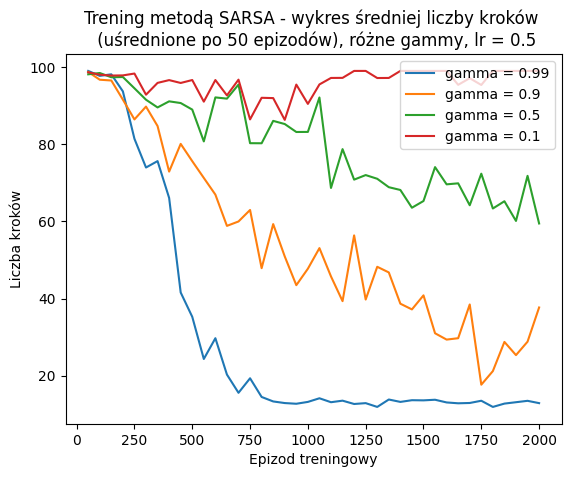

In [8]:

steps_average_1 = [np.mean(np.array(steps_used_1[50*i:50*(i+1)])) for i in range(int(len(steps_used_1)/50))]
steps_average_2 = [np.mean(np.array(steps_used_2[50*i:50*(i+1)])) for i in range(int(len(steps_used_2)/50))]
steps_average_3 = [np.mean(np.array(steps_used_3[50*i:50*(i+1)])) for i in range(int(len(steps_used_3)/50))]
steps_average_4 = [np.mean(np.array(steps_used_4[50*i:50*(i+1)])) for i in range(int(len(steps_used_4)/50))]
plt.plot(x, steps_average_1, label='gamma = 0.99')
plt.plot(x, steps_average_2, label='gamma = 0.9')
plt.plot(x, steps_average_3, label='gamma = 0.5')
plt.plot(x, steps_average_4, label='gamma = 0.1')
plt.title(f"Trening metodą SARSA - wykres średniej liczby kroków \n (uśrednione po 50 epizodów), różne gammy, lr = 0.5")
plt.xlabel('Epizod treningowy')
plt.ylabel('Liczba kroków')
plt.legend(loc='upper right')
plt.savefig(f"Mean_steps_taxi_gamma_sarsa.png")
plt.show()
# Dobrze nauczony agent nie powinien przekraczać 20 kroków do wykonania zadania

In [ ]:

env = gym.make("Taxi-v3", render_mode="ansi") 
total_test_ep = 1
max_steps = 100
rewards = []

for episode in range(total_test_ep):
    state, _ = env.reset() 
    done = False
    total_rewards = 0
    print('=========================')
    print('EPISODE: ', episode)

    for step in range(max_steps):
        print(env.render())  

        action = np.argmax(q_table_3[state, :])
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        total_rewards += reward

        if done:
            print('Score: ', total_rewards)
            break

        state = new_state

    rewards.append(total_rewards)

env.close()
print('Average Score Over Time: {:.2f}'.format(sum(rewards) / total_test_ep))


In [ ]:
import gymnasium as gym
import imageio
import numpy as np

env = gym.make("Taxi-v3", render_mode="rgb_array")
obs, info = env.reset()
frames = []

done = False
while not done:
    frames.append(env.render()) 
    action = np.argmax(q_table_3[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()
imageio.imwrite('frame_taxi.png', frames[0])
imageio.mimsave("taxi_agent.gif", frames, fps=1)


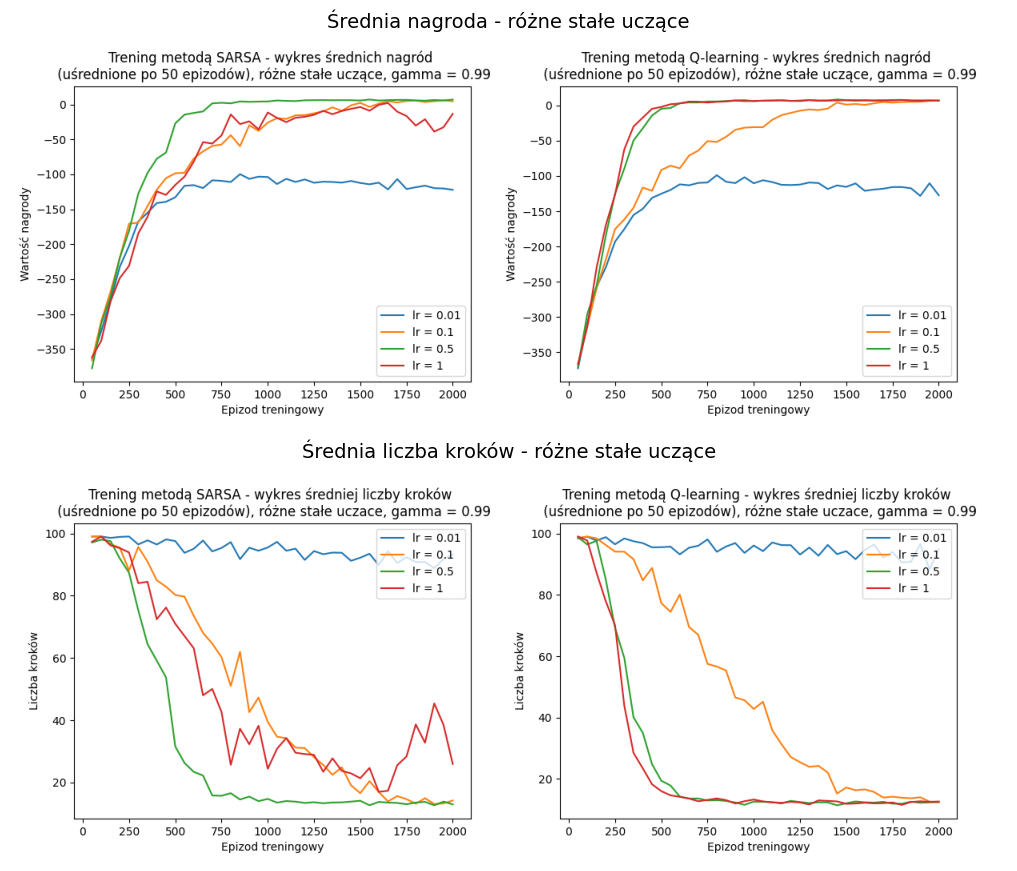

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('Mean_reward_taxi_lr_sarsa.png')
img2 = mpimg.imread('Mean_reward_taxi_lr.png')
img3 = mpimg.imread('Mean_steps_taxi_lr_sarsa.png')
img4 = mpimg.imread('Mean_steps_taxi_lr.png')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(img1)
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')

plt.tight_layout(pad=0.1)
plt.subplots_adjust(wspace=-0.05, hspace=-0.22)

fig.text(0.5, 0.93, 'Średnia nagroda - różne stałe uczące', ha='center', va='center', fontsize=14)

fig.text(0.5, 0.5, 'Średnia liczba kroków - różne stałe uczące', ha='center', va='center', fontsize=14)
plt.savefig("taxi_lr_final.png")
plt.show()


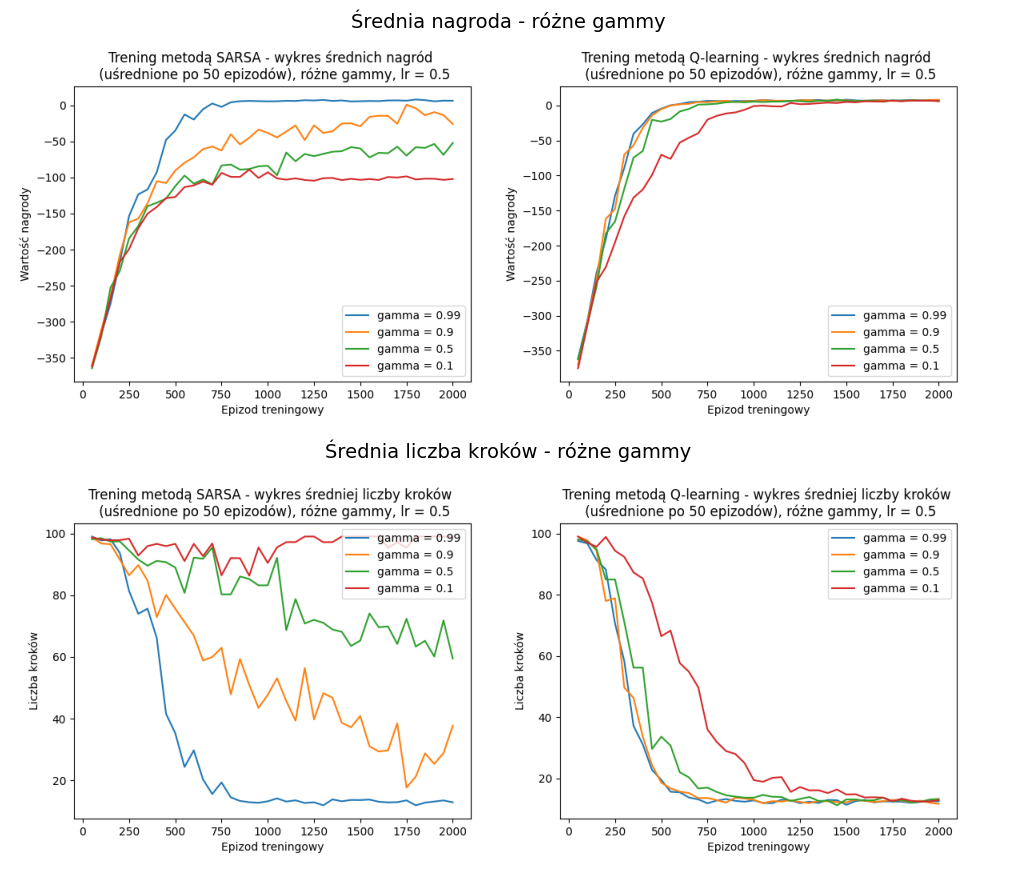

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('Mean_reward_taxi_gamma_sarsa.png')
img2 = mpimg.imread('Mean_reward_taxi_gamma.png')
img3 = mpimg.imread('Mean_steps_taxi_gamma_sarsa.png')
img4 = mpimg.imread('Mean_steps_taxi_gamma.png')

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(img1)
axs[0, 0].axis('off')

axs[0, 1].imshow(img2)
axs[0, 1].axis('off')

axs[1, 0].imshow(img3)
axs[1, 0].axis('off')

axs[1, 1].imshow(img4)
axs[1, 1].axis('off')

plt.tight_layout(pad=0.1)
plt.subplots_adjust(wspace=-0.05, hspace=-0.22)

fig.text(0.5, 0.93, 'Średnia nagroda - różne gammy', ha='center', va='center', fontsize=14)

fig.text(0.5, 0.5, 'Średnia liczba kroków - różne gammy', ha='center', va='center', fontsize=14)
plt.savefig("taxi_gamma_final.png")
plt.show()


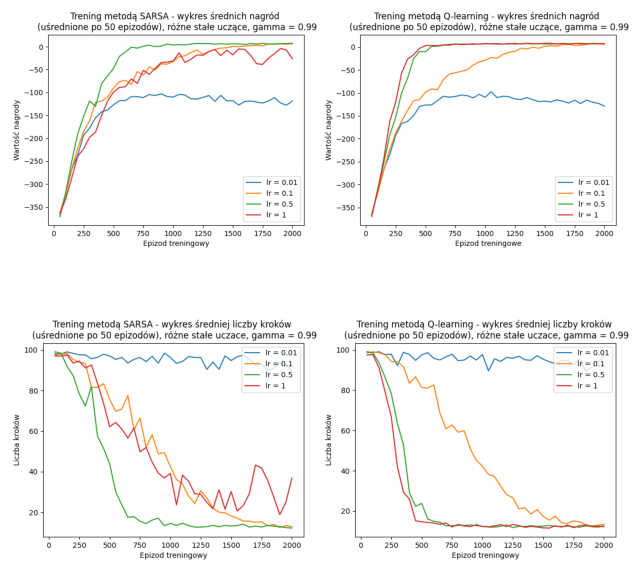

In [ ]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

def crop_image(img_path, padding=10):
    """Crops uniform borders from the image and adds optional padding."""
    img = Image.open(img_path).convert("RGB")

    bg = Image.new("RGB", img.size, img.getpixel((0, 0)))  
    diff = ImageChops.difference(img, bg)
    bbox = diff.getbbox()

    if bbox:
        left = max(bbox[0] - padding, 0)
        top = max(bbox[1] - padding, 0)
        right = min(bbox[2] + padding, img.width)
        bottom = min(bbox[3] + padding, img.height)
        img = img.crop((left, top, right, bottom))

    return img

files = ["Mean_reward_taxi_lr_sarsa.png", "Mean_reward_taxi_lr (1).png", "Mean_steps_taxi_lr_sarsa.png", "Mean_steps_taxi_lr (1).png"]
images = [crop_image(path, padding=5) for path in files]

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for ax, img, title in zip(axs.flat, images, ['Plot 1', 'Plot 2', 'Plot 3', 'Plot 4']):
    ax.imshow(img)
    ax.axis('off')
    #ax.set_title(title, fontsize=10)

plt.subplots_adjust(wspace=0.01, hspace=0.01)

#plt.savefig("combined_clean.png", bbox_inches='tight', dpi=300)

plt.show()


In [ ]:
test_episodes = 10
for ep in range(test_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False
    print(f"Episode {ep+1}")
    while not done:
        action = np.argmax(q_table_3[state, :])
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward
        env.render()
    print(f"Total reward: {total_reward}\n")
env.close()
